In [1]:
import numpy as np
import matplotlib.pyplot as plt

Consider the Allen-Cahn PDE
\begin{align}
u_t - 0.0001 u_{xx} + 5 u^3 - 5 u & = 0\\
u(0, x) &= x^2 \cos(\pi x)\\
u(t, -1) &= u(t, 1)\\
u_x(t, -1) &= u_x(t, 1)
\end{align}

Implement and reproduce Figure 2  in https://www.sciencedirect.com/science/article/pii/S0021999118307125
using a finite-difference scheme.  Explicit Euler timestepping is sufficient.

As a start, consider *zero* boundary conditions

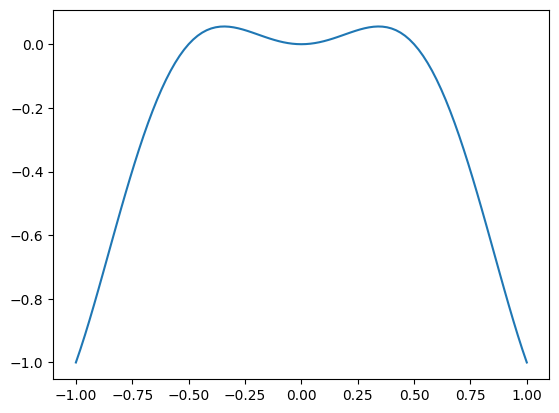

In [2]:
nx = 101
x= np.linspace(-1, 1, nx)
hx = x[1] - x[0]

def uinit(x):
    return x**2 * np.cos(np.pi * x)
plt.plot(x, uinit(x))

In [3]:
# Initial data
T = 1.0
nt = nx
dt = T/nt

u = np.zeros((nt, nx))
u[0] = uinit(x) 
t = 0
idx = 1

# Index for space
K = np.arange(0, nx)    # 0, ..., nx-1
Km1 = np.roll(K, 1)     # nx-1, 0, 1, ..., nx-2
Kp1 = np.roll(K, -1)    # 1, ..., nx


# Iteration
while idx < nt:
    # Indexing and slicing
    u_km1 = u[idx - 1, Km1]
    u_kp1 = u[idx - 1, Kp1]
    u_k = u[idx - 1, K] 
    
    # Second derivative discretization
    u_xx = (u_km1 - 2 * u_k + u_kp1) / hx**2
    
    # Time reconstruction
    u[idx, :] = u[idx - 1, :] + dt * (1e-4*u_xx - 5 * u_k**3 + 5 * u_k)
    
    # Impose BC
    u[idx, 0] = u[idx, -1]
    
    # Neumann BC necessary for this example?
    # Not sure
    
    idx += 1   


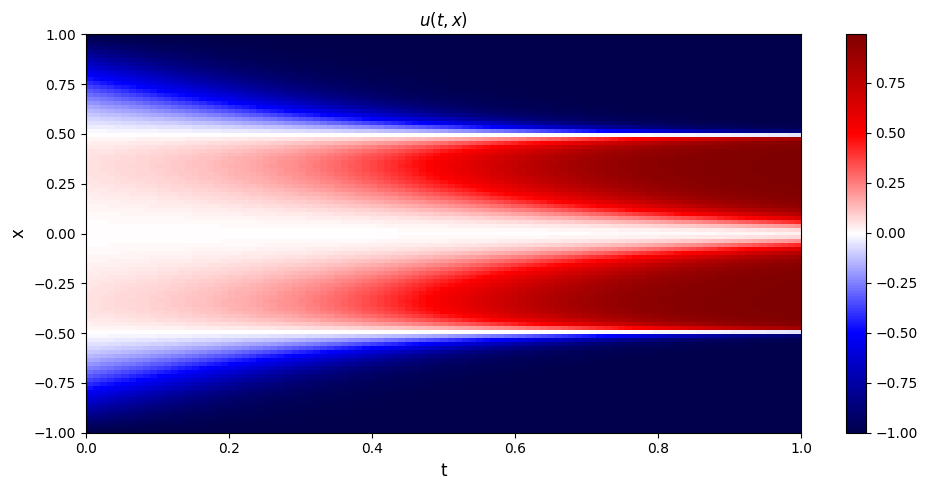

In [8]:
# Plotting section

fig, ax = plt.subplots(figsize=(10,5))
heatmap = ax.imshow(u.T, cmap='seismic', interpolation='nearest', aspect='auto', extent=[0, 1, -1, 1])
fig.colorbar(heatmap, ax=ax)
ax.set_xlabel('t', fontsize=12)
ax.set_ylabel('x', fontsize=12)
ax.set_title(r'$u(t,x)$')

plt.tight_layout()

